In [1]:
# Используя kmeans сделать кластеризацию футбольных команд по стоимости и количеству проигрышей, 
# результат отобразить в виде точечного графика для случая из 3 и из 5 кластеров. 
# Если стоимость команд не указана, то сгенерировать случайные стоимости для команд.

In [113]:
import requests

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import random

%matplotlib inline

In [114]:
from scipy.cluster.vq import whiten, kmeans2

In [115]:
def call_api(uri, result_key):
    json = {}
    try:
        # json = requests.get(uri, headers = { 'X-Auth-Token': 'a292f2dce01345ecb758bc87d41d2fb4' }).json()
        json = requests.get(uri, headers = { 'X-Auth-Token': '6343e2401b274e4b9d3233b7291115e5' }).json()
        return json[result_key]
    except:
        print(json)
        return None

In [116]:
teams = call_api('http://api.football-data.org/v1/soccerseasons/439/teams', 'teams')
teams

[{'_links': {'fixtures': {'href': 'http://api.football-data.org/v1/teams/496/fixtures'},
   'players': {'href': 'http://api.football-data.org/v1/teams/496/players'},
   'self': {'href': 'http://api.football-data.org/v1/teams/496'}},
  'code': None,
  'crestUrl': 'http://upload.wikimedia.org/wikipedia/de/6/63/Rio_Ave_FC.svg',
  'name': 'FC Rio Ave',
  'shortName': 'Rio Ave',
  'squadMarketValue': None},
 {'_links': {'fixtures': {'href': 'http://api.football-data.org/v1/teams/503/fixtures'},
   'players': {'href': 'http://api.football-data.org/v1/teams/503/players'},
   'self': {'href': 'http://api.football-data.org/v1/teams/503'}},
  'code': 'FCP',
  'crestUrl': 'http://upload.wikimedia.org/wikipedia/de/e/ed/FC_Porto_1922-2005.svg',
  'name': 'FC Porto',
  'shortName': 'Porto',
  'squadMarketValue': None},
 {'_links': {'fixtures': {'href': 'http://api.football-data.org/v1/teams/583/fixtures'},
   'players': {'href': 'http://api.football-data.org/v1/teams/583/players'},
   'self': {'href

In [118]:
for team in teams:
    fixtures = call_api(team['_links']['fixtures']['href'], 'fixtures')
    loss = 0
    error = 0
    for f in fixtures:
        try:            
            if team['name'] == f['homeTeamName']:
                if int(f['result']['goalsHomeTeam']) < int(f['result']['goalsAwayTeam']):
                    loss += 1
            if team['name'] == f['awayTeamName']:
                if int(f['result']['goalsHomeTeam']) > int(f['result']['goalsAwayTeam']):
                    loss += 1
        except:
            error += 1
    if not team['squadMarketValue']:
        team['squadMarketValue'] = random.randint(1000000, 10000000)
    print('Team "{}", {} loss, {} squadMarketValue'.format(team['name'], loss, team['squadMarketValue']))
    team['loss'] = loss

Team "FC Rio Ave", 12 loss, 1665364 squadMarketValue
Team "FC Porto", 5 loss, 7532226 squadMarketValue
Team "Moreirense FC", 15 loss, 1712133 squadMarketValue
Team "FC Paços de Ferreira", 14 loss, 8033784 squadMarketValue
Team "Sporting CP", 6 loss, 3827695 squadMarketValue
Team "Maritimo Funchal", 10 loss, 7661273 squadMarketValue
Team "CD Tondela", 14 loss, 5045479 squadMarketValue
Team "SL Benfica", 7 loss, 3003484 squadMarketValue
Team "Boavista Porto FC", 13 loss, 2933732 squadMarketValue
Team "FC Arouca", 0 loss, 7657271 squadMarketValue
Team "Vitoria Setubal", 13 loss, 3656105 squadMarketValue
Team "C.F. Os Belenenses", 12 loss, 5794684 squadMarketValue
Team "Vitoria Guimaraes", 15 loss, 2438405 squadMarketValue
Team "Sporting Braga", 6 loss, 4533576 squadMarketValue
Team "GD Estoril Praia", 18 loss, 6529757 squadMarketValue
Team "Feirense", 19 loss, 9161725 squadMarketValue
Team "Nacional Funchal", 0 loss, 4116756 squadMarketValue
Team "G.D. Chaves", 12 loss, 6153422 squadMarke

In [119]:
team_for_pd = []
for team in teams:
    if team['name']:
        team_for_pd.append({'name': team['name'], 'loss': (team['loss']), 'squadMarketValue': team['squadMarketValue']})
team_for_pd

[{'loss': 12, 'name': 'FC Rio Ave', 'squadMarketValue': 1665364},
 {'loss': 5, 'name': 'FC Porto', 'squadMarketValue': 7532226},
 {'loss': 15, 'name': 'Moreirense FC', 'squadMarketValue': 1712133},
 {'loss': 14, 'name': 'FC Paços de Ferreira', 'squadMarketValue': 8033784},
 {'loss': 6, 'name': 'Sporting CP', 'squadMarketValue': 3827695},
 {'loss': 10, 'name': 'Maritimo Funchal', 'squadMarketValue': 7661273},
 {'loss': 14, 'name': 'CD Tondela', 'squadMarketValue': 5045479},
 {'loss': 7, 'name': 'SL Benfica', 'squadMarketValue': 3003484},
 {'loss': 13, 'name': 'Boavista Porto FC', 'squadMarketValue': 2933732},
 {'loss': 0, 'name': 'FC Arouca', 'squadMarketValue': 7657271},
 {'loss': 13, 'name': 'Vitoria Setubal', 'squadMarketValue': 3656105},
 {'loss': 12, 'name': 'C.F. Os Belenenses', 'squadMarketValue': 5794684},
 {'loss': 15, 'name': 'Vitoria Guimaraes', 'squadMarketValue': 2438405},
 {'loss': 6, 'name': 'Sporting Braga', 'squadMarketValue': 4533576},
 {'loss': 18, 'name': 'GD Estoril

In [120]:
teams_pd = pd.DataFrame(team_for_pd)
teams_pd

,loss,name,squadMarketValue
0,12,FC Rio Ave,1665364
1,5,FC Porto,7532226
2,15,Moreirense FC,1712133
3,14,FC Paços de Ferreira,8033784
4,6,Sporting CP,3827695
5,10,Maritimo Funchal,7661273
6,14,CD Tondela,5045479
7,7,SL Benfica,3003484
8,13,Boavista Porto FC,2933732
9,0,FC Arouca,7657271


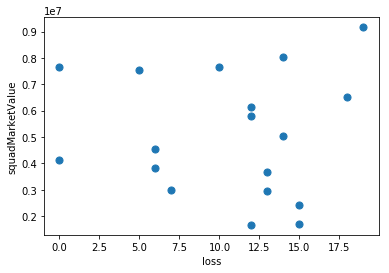

In [122]:
teams_pd.plot.scatter(x='loss', y='squadMarketValue', s=50)

In [123]:
del teams_pd['name']
teams_pd

,loss,squadMarketValue
0,12,1665364
1,5,7532226
2,15,1712133
3,14,8033784
4,6,3827695
5,10,7661273
6,14,5045479
7,7,3003484
8,13,2933732
9,0,7657271


In [124]:
whitened = whiten(teams_pd.as_matrix())
whitened

array([[2.24065908, 0.73587072],
       [0.93360795, 3.32824812],
       [2.80082385, 0.75653644],
       [2.61410226, 3.54987045],
       [1.12032954, 1.69133516],
       [1.8672159 , 3.38526983],
       [2.61410226, 2.2294347 ],
       [1.30705113, 1.32714286],
       [2.42738067, 1.2963217 ],
       [0.        , 3.38350148],
       [2.42738067, 1.61551507],
       [2.24065908, 2.56048426],
       [2.80082385, 1.07745265],
       [1.12032954, 2.00324124],
       [3.36098862, 2.88528935],
       [3.54771021, 4.04827125],
       [0.        , 1.81906191],
       [2.24065908, 2.71899903]])

In [125]:
centroids, cluster_map = kmeans2(whitened, 3)
centroids, cluster_map

(array([[0.74688636, 2.25875513],
        [2.53941362, 1.09633931],
        [2.64077677, 3.05394555]]),
 array([1, 0, 1, 2, 0, 2, 2, 0, 1, 0, 1, 2, 1, 0, 2, 2, 0, 2]))

In [126]:
colors_map = {0: 'r', 1: 'g', 2: 'b', 3: 'y', 4: 'm'}
colors = [colors_map[c] for c in cluster_map]
colors

['g',
 'r',
 'g',
 'b',
 'r',
 'b',
 'b',
 'r',
 'g',
 'r',
 'g',
 'b',
 'g',
 'r',
 'b',
 'b',
 'r',
 'b']

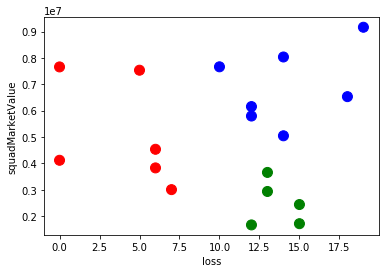

In [127]:
teams_pd.plot.scatter(x='loss', y='squadMarketValue', c=colors, s=100)

In [128]:
centroids, cluster_map = kmeans2(whitened, 5)
centroids, cluster_map

(array([[0.31120265, 2.84360383],
        [2.64522252, 3.19136403],
        [2.4896212 , 1.71375715],
        [1.18257007, 1.67390642],
        [2.61410226, 0.85661994]]),
 array([4, 0, 4, 1, 3, 1, 2, 3, 2, 0, 2, 1, 4, 3, 1, 1, 0, 1]))

In [129]:
colors_map = {0: 'r', 1: 'g', 2: 'b', 3: 'y', 4: 'm'}
colors = [colors_map[c] for c in cluster_map]
colors

['m',
 'r',
 'm',
 'g',
 'y',
 'g',
 'b',
 'y',
 'b',
 'r',
 'b',
 'g',
 'm',
 'y',
 'g',
 'g',
 'r',
 'g']

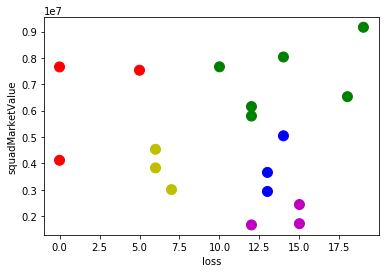

In [130]:
teams_pd.plot.scatter(x='loss', y='squadMarketValue', c=colors, s=100)